In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

In [114]:
file_1=pd.read_csv("crack_detection.csv")

In [115]:
file_1

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
0,0,107.5734,29.267480,0.744029,0.408828,110.2533,26.953218,1.254689,-0.135613,113.5715,...,9.181953,177.0,173.0,162.0,0.951368,0.913876,0.803333,856.585412,726.475939,0
1,1,178.6713,14.917756,3.192406,0.238175,184.4947,14.882156,3.035196,0.141160,190.8538,...,9.207314,142.0,136.0,129.0,0.988325,0.989474,0.976787,222.539456,221.478572,0
2,2,176.6517,34.618255,-0.146336,-0.421552,161.3083,33.688699,0.057178,-0.521476,147.2760,...,9.186737,199.0,200.0,194.0,0.968581,0.967398,0.890845,1198.423587,1134.928451,1
3,3,113.5760,20.084502,0.719752,0.737728,114.0056,19.536222,0.655846,0.729521,113.6179,...,9.197973,146.0,142.0,138.0,0.987383,0.983663,0.961305,403.387224,381.663969,0
4,4,125.3565,29.251595,0.430344,0.833496,129.5277,28.661968,0.475502,0.804161,131.9745,...,9.189257,173.0,176.0,177.0,0.980727,0.986702,0.950291,855.655808,821.508433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,147.4849,39.849040,-0.413560,-0.713162,143.8830,36.109081,-0.333042,-0.721668,138.3563,...,9.180812,196.0,180.0,168.0,0.991360,0.988178,0.968726,1587.945972,1303.865711,1
696,696,131.6387,22.462007,0.060316,-0.598803,129.3470,20.965238,0.249974,-0.611380,125.9734,...,9.199403,169.0,163.0,157.0,0.992205,0.977108,0.954988,504.541762,439.541191,1
697,697,124.9098,24.410827,-0.014904,0.298252,130.4604,23.675959,-0.086843,0.180634,135.0006,...,9.195094,152.0,145.0,143.0,0.981116,0.986397,0.953482,595.888464,560.551032,0
698,698,100.5366,41.107908,-0.385692,0.309762,98.8532,40.835684,-0.356037,0.269909,98.9559,...,9.125664,233.0,231.0,227.0,0.996501,0.997454,0.994056,1689.860060,1667.553050,1


In [116]:
file_1.describe()

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,349.50000,129.904131,29.725915,0.783304,0.210021,129.513118,28.191406,0.905234,0.210064,128.842019,...,9.185198,178.245714,173.781429,170.375714,0.984945,0.982444,0.958198,978.008986,880.738813,0.498571
std,202.21688,22.533741,9.721830,2.921148,0.832188,20.781828,9.279358,3.000051,0.848674,19.436542,...,0.018515,33.888983,34.655417,35.610478,0.024409,0.027450,0.069144,565.834008,520.580605,0.500355
min,0.00000,72.085700,5.257114,-1.616288,-3.788320,78.022200,4.543611,-1.567842,-3.761659,82.738400,...,9.085941,55.000000,48.000000,52.000000,0.731441,0.740211,0.279195,27.637244,20.644398,0.000000
25%,174.75000,117.223100,21.865794,-0.520055,-0.251850,118.032050,20.951718,-0.460405,-0.247178,118.039500,...,9.177954,152.750000,150.000000,146.000000,0.984907,0.982613,0.957100,478.115830,438.975044,0.000000
50%,349.50000,127.525400,31.030772,-0.071472,0.211199,127.457500,29.333898,-0.011488,0.202783,126.579200,...,9.188351,184.500000,179.000000,175.000000,0.991413,0.989603,0.974893,962.908945,860.477925,0.000000
75%,524.25000,140.418825,37.210949,1.042058,0.593044,138.861175,34.737146,1.177957,0.613642,136.463700,...,9.199160,202.000000,197.000000,193.250000,0.994256,0.993197,0.983471,1384.654910,1206.669310,1.000000
max,699.00000,207.160800,52.226058,44.499978,5.645803,198.134400,51.168733,44.984072,5.623845,196.270800,...,9.209413,255.000000,254.000000,255.000000,0.998194,0.998387,0.997126,2727.561173,2618.239239,1.000000


In [117]:
file_1.isnull().sum()

Unnamed: 0    0
mean_r        0
std_r         0
kur_r         0
skew_r        0
mean_g        0
std_g         0
kur_g         0
skew_g        0
mean_b        0
std_b         0
kur_b         0
skew_b        0
entropy_r     0
entropy_g     0
contrast_r    0
contrast_g    0
contrast_b    0
corr_rg       0
corr_rb       0
corr_gb       0
moment_r      0
moment_g      0
moment_b      0
label         0
dtype: int64

In [118]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   mean_r      700 non-null    float64
 2   std_r       700 non-null    float64
 3   kur_r       700 non-null    float64
 4   skew_r      700 non-null    float64
 5   mean_g      700 non-null    float64
 6   std_g       700 non-null    float64
 7   kur_g       700 non-null    float64
 8   skew_g      700 non-null    float64
 9   mean_b      700 non-null    float64
 10  std_b       700 non-null    float64
 11  kur_b       700 non-null    float64
 12  skew_b      700 non-null    float64
 13  entropy_r   700 non-null    float64
 14  entropy_g   700 non-null    float64
 15  contrast_r  700 non-null    float64
 16  contrast_g  700 non-null    float64
 17  contrast_b  700 non-null    float64
 18  corr_rg     700 non-null    float64
 19  corr_rb     700 non-null    f

Splitting dataset in this order: 60% train, 20% validation, and 20 % test

In [119]:
file_1['label'].value_counts()

0    351
1    349
Name: label, dtype: int64

In [156]:
X = file_1.iloc[:,:-1].values
Y = file_1.iloc[:,-1:].values

In [157]:
print([X.shape,Y.shape])

[(700, 24), (700, 1)]


In [158]:
def normalize(X):
  return (X - np.mean(X,axis = 0))/np.std(X,axis = 0)

In [159]:
X = normalize(X)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [161]:
X_train.shape

(560, 24)

In [162]:
y_train.shape

(560, 1)

In [163]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))

In [164]:
def forward(X,W,b):
  y = sigmoid(np.dot(X,W)+b)
  return y

In [165]:
def predict(X,W,b):
  predicted = (np.dot(X,W)+b)
  y = np.where(predicted>0.5,1,0)
  return y

In [166]:
def costFunct(y,y_hat):
  l = -np.mean(np.log(y_hat)*y + np.log(1-y_hat)*(1-y))
  return l

In [167]:
def gradient(X,Y,W,b):
  m = X.shape[0]
  y_hat = np.expand_dims(forward(X,W,b),axis=1)
  dw = ((1/m)*np.dot(X.T,(y_hat - Y))).squeeze()
  db = (1/m)*(np.sum((y_hat - Y)))
  return dw,db

In [168]:
def BinarylogRegClassifier(X,Y,num_iter,learning_rate=0.001):
  m,n = X.shape
  W = np.random.random((n))
  b = np.random.random(1)
  losses = []

  for i in range(num_iter):
    Y_hat = forward(X,W,b)
    losses.append([i,costFunct(Y,Y_hat)])
    dw,db = gradient(X,Y,W,b)
    W -= learning_rate*dw
    b -= learning_rate*db

    return losses,W,b
    

In [169]:
losses,W,b = BinarylogRegClassifier(X_train,y_train,100)

In [170]:
losses = np.asarray(losses)

In [171]:
losses.shape

(1, 2)

In [172]:
epochs = losses[:,0]
loss = losses[:,1]

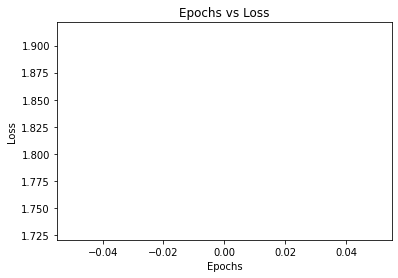

In [173]:
plt.plot(epochs,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.show()

In [184]:

logisticRegressor = LogisticRegression()

In [185]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

In [186]:
test_size = 0.5

In [187]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [188]:
print(X_train.shape)


(420, 24)


In [189]:
print(y_train.shape)

(420,)


In [190]:
print(X_valid.shape)

(140, 24)


In [191]:
print(X_valid.shape)

(140, 24)


In [192]:
print(X_test.shape)

(140, 24)


In [193]:
print(y_test.shape)

(140,)


In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [195]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [196]:
y_pred = svc.predict(X_test)

In [197]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.853
